In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
### Importing training, validation and test dataset ###

def data_import(path):
    df = pd.read_csv(path, delimiter=',')
    training_data, remaining_data = train_test_split(df, test_size=0.2, random_state=13)
    validation_data,test_data = train_test_split(remaining_data,test_size=0.5, random_state = 11)

    return training_data, validation_data, test_data

#filename = 'US_youtube_trending_data.csv'
filename = 'ted_main.csv'
train_set,valid_set,test_set = data_import(filename)


193.2093137254902


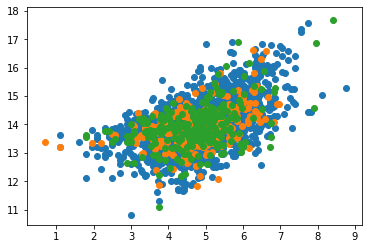

In [3]:
names = train_set['title']

number_comments = train_set['comments']
log_number_comments = np.log(number_comments)
number_views = train_set['views']
log_number_views = np.log(number_views)

print(np.average(number_comments))
plt.scatter(log_number_comments,log_number_views)
plt.scatter(np.log(valid_set['comments']),np.log(valid_set['views']))
plt.scatter(np.log(test_set['comments']),np.log(test_set['views']))

In [5]:
### Vanilla linear regression
from sklearn.linear_model import LinearRegression

X = np.array(number_comments).reshape((-1, 1))
y=number_views

#Constant estimator
print("Using constant estimate :")
print("Best constant estimate for views = ",np.average(number_views))

print("Standard prediction error = ",np.sqrt(np.average((np.average(train_set['views'])-valid_set['views'])**2)))

#Linear estimator
print("Using linear estimate :")
reg = LinearRegression().fit(X,y)
print("Estimated Views = ",reg.intercept_,"+ Comments * ",reg.coef_)
valid_predict = reg.predict(np.array(valid_set['comments']).reshape((-1, 1)))
print("Standard prediction error = ",np.sqrt(np.average((valid_predict-valid_set['views'])**2)))

Using constant estimate :
Best constant estimate for views =  1719018.7583333333
Standard prediction error =  1809508.172303224
Using linear estimate :
Estimated Views =  933999.5008889958 + Comments *  [4063.05080385]
Standard prediction error =  1588254.9305533483


In [12]:
### Regression with log-transformed data for views and comments

X = np.array(log_number_comments).reshape((-1, 1))
y=log_number_views


reg = LinearRegression().fit(X, y)


#Linear estimator
print("Using linear estimate :")
reg = LinearRegression().fit(X,y)
print("log(Estimated Views) = ",reg.intercept_,"+ log(Comments) * ",reg.coef_)
print("Estimated Views = ",np.exp(reg.intercept_),"* Comments^",reg.coef_)

valid_predict = reg.predict(np.array(valid_set['comments']).reshape((-1, 1)))
#print(np.sqrt(np.average((np.exp(valid_predict)-valid_set['views'])**2)))


print("Standard prediction error = ",np.sqrt(np.average((valid_predict-valid_set['views'])**2)))

Using linear estimate :
log(Estimated Views) =  12.037168421632424 + log(Comments) *  [0.40952767]
Estimated Views =  168917.9582061213 * Comments^ [0.40952767]
Standard prediction error =  2316100.696455157


11711.29778477991


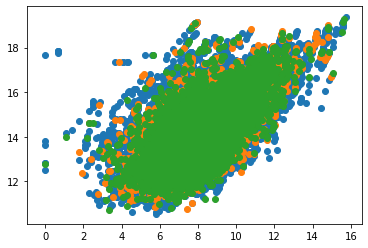

In [76]:

def data_import(path):
    df = pd.read_csv(path, delimiter=',')
    df= df[df['comment_count']!=0]
    df = df[df['view_count']!=0]
    training_data, remaining_data = train_test_split(df, test_size=0.2)
    validation_data,test_data = train_test_split(remaining_data,test_size=0.5, random_state = 11)
    return training_data, validation_data, test_data

filename = 'US_youtube_trending_data.csv'

train_set,valid_set,test_set = data_import(filename)

names = train_set['title']

number_comments = train_set['comment_count']
log_number_comments = np.log(number_comments)
number_views = train_set['view_count']
log_number_views = np.log(number_views)

print(np.average(number_comments))
plt.scatter(log_number_comments,log_number_views)
plt.scatter(np.log(valid_set['comment_count']),np.log(valid_set['view_count']))
plt.scatter(np.log(test_set['comment_count']),np.log(test_set['view_count']))

In [77]:
### Vanilla linear regression
from sklearn.linear_model import LinearRegression

X = np.array(number_comments).reshape((-1, 1))
y=number_views

#Constant estimator
print("Using constant estimate :")
print("Best constant estimate for views = ",np.average(number_views))

print("Standard prediction error = ",np.sqrt(np.average((np.average(train_set['view_count'])-valid_set['view_count'])**2)))

#Linear estimator
print("Using linear estimate :")
reg = LinearRegression().fit(X,y)
print("Estimated Views = ",reg.intercept_,"+ Comments * ",reg.coef_)
valid_predict = reg.predict(np.array(valid_set['comment_count']).reshape((-1, 1)))
print("Standard prediction error = ",np.sqrt(np.average((valid_predict-valid_set['view_count'])**2)))

Using constant estimate :
Best constant estimate for views =  2645879.441669054
Standard prediction error =  7803321.30533417
Using linear estimate :
Estimated Views =  2135787.859599548 + Comments *  [43.55551293]
Standard prediction error =  6856946.471780308


In [80]:
### Linear regression with log-transformed inputs
X = np.array(log_number_comments).reshape((-1, 1))
y=log_number_views

print("Using constant estimate :")
print("Best constant estimate for views = ",np.exp(np.average(log_number_views)))

print("Standard prediction error = ",np.sqrt(np.average((np.exp(np.average(log_number_views))-valid_set['view_count'])**2)))

print("log-based prediction error = ",np.sqrt(np.average((np.average(log_number_views)-np.log(valid_set['view_count']))**2)))

print("Using linear estimate :")
reg = LinearRegression().fit(X,y)
print("Estimated log(Views) = ",reg.intercept_,"+ log(Comments) * ",reg.coef_)
valid_log_predict = reg.predict(np.array(np.log(valid_set['comment_count'])).reshape((-1, 1)))
print("Standard prediction error = ",np.sqrt(np.average((np.exp(valid_log_predict)-valid_set['view_count'])**2)))
print("Log-based prediction error = ",np.sqrt(np.average((valid_log_predict-np.log(valid_set['view_count']))**2)))


Using constant estimate :
Best constant estimate for views =  1179895.741984561
Standard prediction error =  7964700.277395947
log-based prediction error =  1.142075172551228
Using linear estimate :
Estimated log(Views) =  9.212552436290547 + log(Comments) *  [0.58194034]
Standard prediction error =  6812340.497646381
Log-based prediction error =  0.8272710267870765
